After observing how the Linear Regression Model had a tendecy to learn redundant noise/behavior, *Support Vector Machine (SVM)* analysis become a viable choice to try out. SVMs are a popular machine learning tool for classification and regression, support both linear and nonlinear regression, being referred to as Support Vector Regression (SVR).<br>
<br>
In this notebook, I will use SVR to make a prediction on the following stock price for a certain stock. I will use the three models for SVR: linear, polynomial, and radial basis function (RBF), which is the default kernel for SVR.

In [0]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd 
import quandl

In [0]:
from stockai import Stock

td = Stock('NVDA')
prices_list = td.get_historical_prices('2020-01-01', '2020-01-30')
df = pd.DataFrame.from_dict(prices_list)
df.head()

,high,low,volume,close,open,date,adjclose
0,239.910004,236.720001,5938400,239.910004,238.750000,2020-01-02,239.766586
1,237.830002,234.100006,5134600,236.070007,235.100006,2020-01-03,235.928894
2,237.270004,231.270004,6565900,237.059998,232.320007,2020-01-06,236.918289
3,241.770004,236.389999,7871400,239.929993,238.199997,2020-01-07,239.786575
4,242.039993,238.149994,6927700,240.380005,239.759995,2020-01-08,240.236313


In [0]:
# Function to get data

def get_data(df):  
    data = df.copy()
    data['date'] = data['date'].str.split('-').str[2]
    data['date'] = pd.to_numeric(data['date'])
    return [ data['date'].tolist(), data['close'].tolist() ] # Convert Series to listdates

dates, prices = get_data(df)

In [0]:
def predict_price(dates, prices, x):
    dates = np.reshape(dates,(len(dates), 1)) # convert to 1 x n dimension
    x = np.reshape(x,(len(x), 1))
    
    svr_lin  = SVR(kernel='linear', C=1e3)           # linear kernel
    svr_poly = SVR(kernel='poly', C=1e3, degree=2)   # polynomial kernel
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)    # radial basis function (RBF) kernel
    
    # Fit regression model for kernels
    svr_lin.fit(dates, prices)
    svr_poly.fit(dates, prices)
    svr_rbf.fit(dates, prices)
    
    # Print Scores for each model
    rbf_score = svr_rbf.score(dates, prices)
    lin_score = svr_lin.score(dates, prices)
    poly_score = svr_poly.score(dates, prices)

    
    # Plot results
    plt.scatter(dates, prices, c='k', label='Data')
    plt.plot(dates, svr_lin.predict(dates), c='g', label='Linear model')
    plt.plot(dates, svr_rbf.predict(dates), c='r', label='RBF model')    
    plt.plot(dates, svr_poly.predict(dates), c='b', label='Polynomial model')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('NVIDIA Support Vector Regression Among 3 Models')
    plt.legend()
    plt.show()
    
    # Print Figures
    print("Radial Basis Function prediction: ",svr_rbf.predict(x)),
    print("Linear Model Prediction: ", svr_lin.predict(x)), 
    print("Polynomial Model Prediction: ", svr_poly.predict(x) )
    print(" ")
    print("Radial Basis Function Score: ", rbf_score)
    print("Linear Model Score: ", lin_score)
    print("Polynomial Model Score: ", poly_score)
    return svr_rbf.predict(x)[0], svr_lin.predict(x)[0], svr_poly.predict(x)[0]

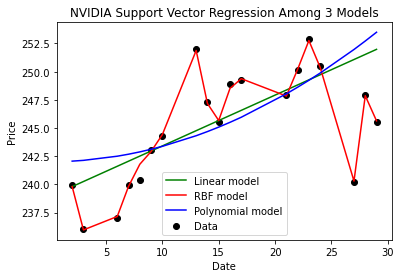

Radial Basis Function prediction:  [221.66077921]
Linear Model Prediction:  [252.88231952]
Polynomial Model Prediction:  [255.13581179]
 
Radial Basis Function Score:  0.9950002727625934
Linear Model Score:  0.3402685462881597
Polynomial Model Score:  0.11117637110602341


(221.660779207957, 252.88231952354244, 255.13581179310012)

In [0]:
predict_price(dates, prices, [31]) # Here we call the function and pass the number [31], in order to predict
                                   # the next stock price from the linear, polynomial, and RBF kernels, respectively.

In [0]:
# Grab the true value of the following stock to compare to the 3 models.

true_price = td.get_historical_prices('2020-01-31', '2020-02-01')
true_price['close']

[236.42999267578125]

After running this model with a number of stocks such as TSLA, MSFT, NFLX, NVDA, and more, it seems that the RBF model and the Polynomial model do better job at accurately predicting the next stocks price. This makes sense as most stock prices usually don't follow a linear model.